# <center> Housing prediction

## Subject

In this project we will try to build a model that will predict the median housing price of in any district of California 

## The DataSet

We will the California Housing Prices dataset from the StatLib repository. This dataset was based on data from the 1990 California census.
It is not exactly recent, but it has many qualities for learning, so we will pretend it is recent data.

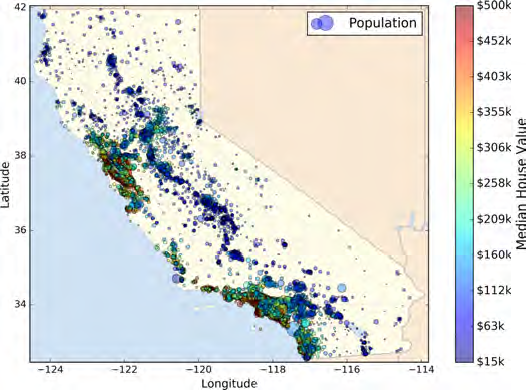

## Type of problem to solve

Here we try to predict a value, so the problem to use is a __Regression__ problem

## Performance Measure

* #### RMSE (Root Mean Square Error)

A typical P.M for regression is RMSE. It measures the standard deviation of the errors that system makes in its predictions. For example, an RMSE equal to 50,000 means that about 68% of the system’s predictions fall within 50,000 of the actual value, and about 95% of the predictions fall within $100,000 of the actual value

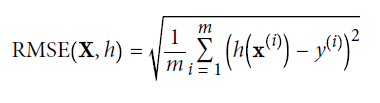

with : <ul> <li> ___m___ is the cardinal </li>
            <li> ___xi___ is a vector of all the features value of the ith insatance of the dataset </li>
            <li> ___yi___ is the label of that ith instance </li>
            <li> ___h___ is the hypothesis, also called the prediction function </li>
            <li> ___X___ is the matrix containing all the features of all instances of the data excluding the labels </li>
            


* #### MAE (Mean Absolut Error)

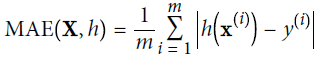

The MAE is based on calculating the Manhathan distance with the absolut value of each substraction instead of the calculating the root for the RMSE method. 

Even though the RMSE is generally the preferred performance measure for regression
tasks, in some contexts you may prefer to use another function. For example, suppose
that there are many outlier districts. In that case, you may consider using the Mean
Absolute Error (also called the Average Absolute Deviation).

RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs
very well and is generally preferred.

## Collecting the data

The data are stored in a remote data store.

So to use it we can manualy download it and use it. Or we can build a function that downloads the tar, decompresses the file then extract the CSV.

The second technique is very usefull to create automated processes

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH) :
    if not(os.path.isdir(housing_path)):
        os.path.mkdirs(housing_path)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
#fetch_housing_data()
housing = load_housing_data()

## Quick look at the data

In [4]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
display(housing.describe())

display(housing.describe(include='O'))

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136

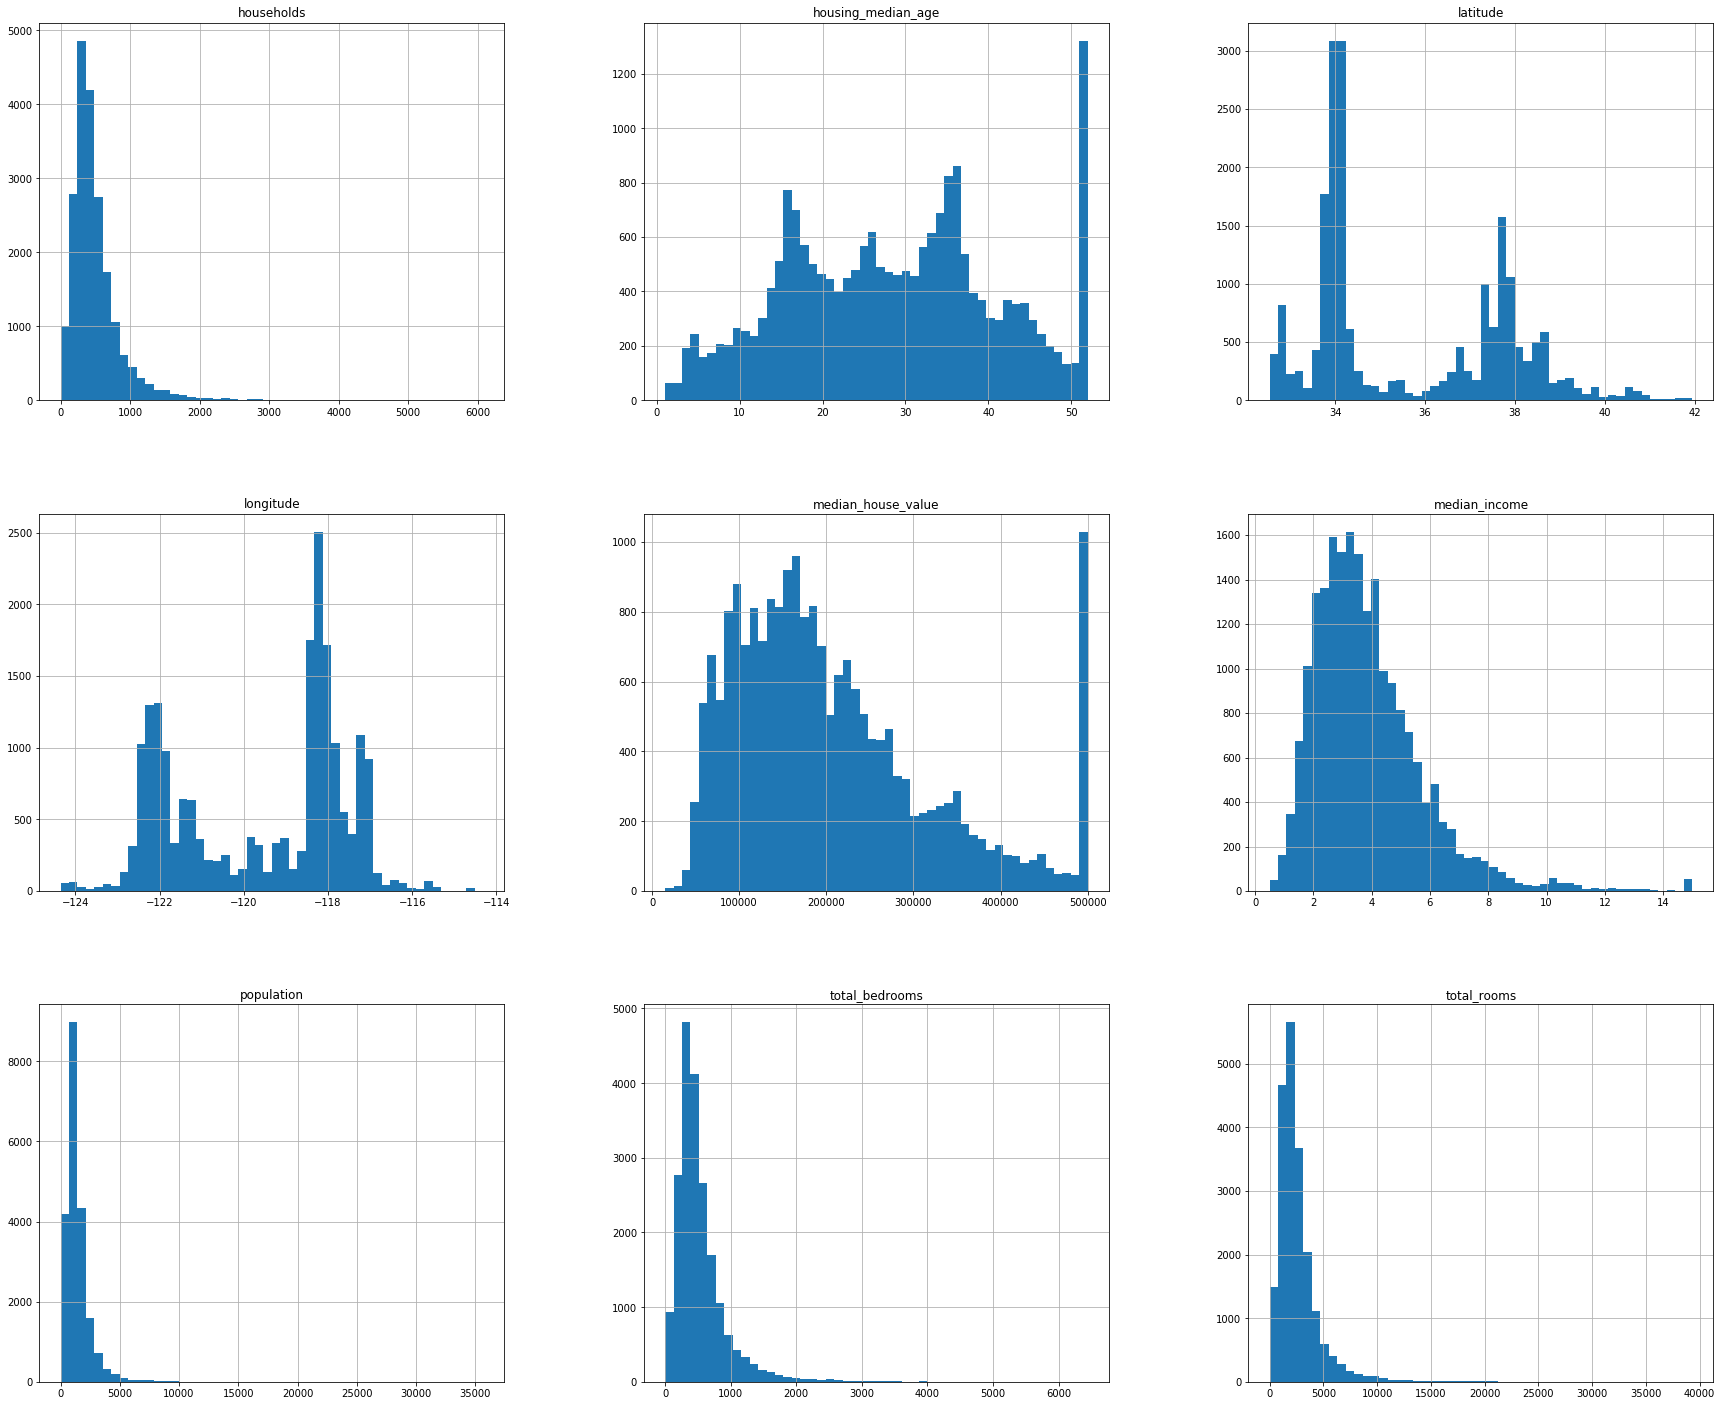

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(30,25))
plt.show()

From these graphs we can observe several things 
* 1: there are some parameters which have strong spikes at the far right. After studying the description of the data we understand that these parameters have been caped. Its the case for :
    * __median_income__ capped at 15
    * __housing_median_age__ at 52
    * __median_house_value__ at 500 000 : This one is he most problematic because it's our target attribute

* 2 : The attributes have very different scales

* 3 : We also see that many parameters extend to the right, this is called being _tail heavy_, This characteristic makes the prediction for some models difficult, it is therefore necessary to round the curve, to make it more Gaussian or normal

## Create a training and test set

We gonna separate the dataset as 80% of training set and 20% of test set.

There's many methods to sample a dataset. We can sample the dataset randomly with this simple oneliner by sklearn :

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

It's considered as a sufficient method for sampling when we have large datasets. But if it's not, we run the risk to introduce a significant sampling bias. In fact, the samples need to be representative of the whole population. So if in the real world there's for exemple 51.3% of female and 49.7% of male, a sample of size 1000 needs to maintain that ratio : so we shoiuld have 513 female and 487 male. This is called __stratified sampling__

The experts told us that the median income is a very important attribute. So we want to ensure that the test set is reptresntative of the various categories of incomes in the whole dataset.

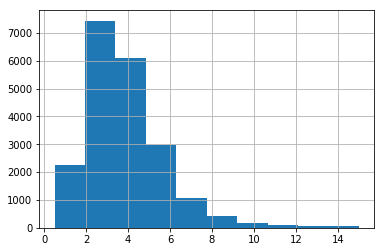

In [10]:
housing.median_income.hist()

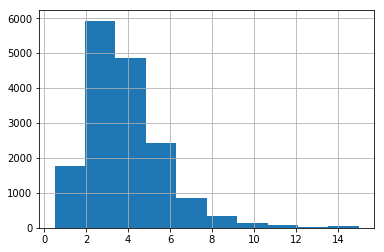

In [11]:
train_set.median_income.hist()

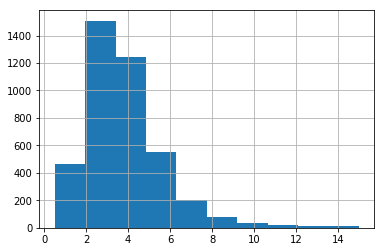

In [12]:
test_set.median_income.hist()

The proportions are the same. But we can see that when the majority of the population is concentrated between 2 and 5, out of this interval there's not many elements. So we will create a stratified sampling function

In [13]:
import numpy as np
def processing_income_cat(df):
    df["income_cat"] = np.ceil(df["median_income"]/1.5)    
    df["income_cat"].where(df["income_cat"] < 5, 5.0,inplace=True)

In [14]:
processing_income_cat(housing)

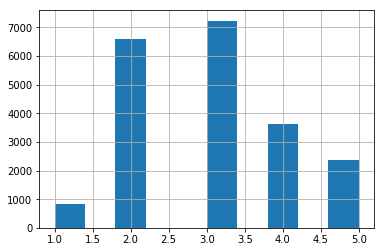

In [15]:
housing["income_cat"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Now the dataset has been splet into two subsets with a stratified function. Let's se if the proportions have been saved

In [17]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [18]:
errors = pd.DataFrame(columns=['Overall','Random','Stratified','Rand % error','Strat % error'])

In [19]:
del errors

In [20]:
processing_income_cat(test_set)

C:\Users\Stone\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Stone\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [21]:
errors = pd.DataFrame()
errors['Overall'] = (housing["income_cat"].value_counts()/len(housing)).sort_index()

errors['Random'] = (test_set["income_cat"].value_counts()/len(test_set)).sort_index()

errors['Stratified'] = (strat_test_set["income_cat"].value_counts()/len(strat_test_set)).sort_index()

In [22]:
errors

Overall    Random  Stratified
1.0  0.039826  0.040213    0.039729
2.0  0.318847  0.324370    0.318798
3.0  0.350581  0.358527    0.350533
4.0  0.176308  0.167393    0.176357
5.0  0.114438  0.109496    0.114583

In [23]:
def error_counting(df):
    data = {}
    for col in df.columns[1:]:
        df[col+' % error'] = ((df[col]-df.iloc[:,0]) / df.iloc[:,0]) * 100

In [24]:
error_counting(errors)

In [25]:
errors

Overall    Random  Stratified  Random % error  Stratified % error
1.0  0.039826  0.040213    0.039729        0.973236           -0.243309
2.0  0.318847  0.324370    0.318798        1.732260           -0.015195
3.0  0.350581  0.358527    0.350533        2.266446           -0.013820
4.0  0.176308  0.167393    0.176357       -5.056334            0.027480
5.0  0.114438  0.109496    0.114583       -4.318374            0.127011

As we can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed

Now we should remove the income_cat attribute so the data is back to its original
state:

In [26]:
for set in (strat_test_set,strat_train_set) :
    set.drop(columns='income_cat',inplace=True)

# Discover and Visualize the Data to Gain Insights

Since we've took a quick glance at the data. Now it's time to look more deeply in it.

To do so, we will explore the training set. Sometimes, when the training set is too large, we make sample it to make data exploration simpler. But here, as our training set is quite small, we d'ont have to take this aditionnal step. But to have keep our training set as it is. we'll copy it into a new set

In [27]:
housing = strat_train_set.copy()

### Quick review at our columns

In [28]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Visualizing Geographical Data

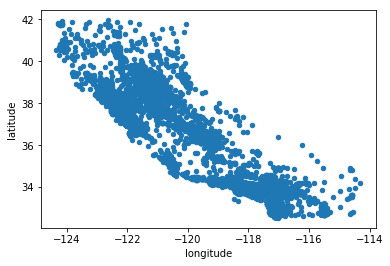

In [29]:
housing.plot(kind='scatter',x='longitude',y='latitude')

Ok. So up to here, the plot looks like california, but it's hard to see anything else. To so discover the high density points, we'll specify the __alpha to 0.1__

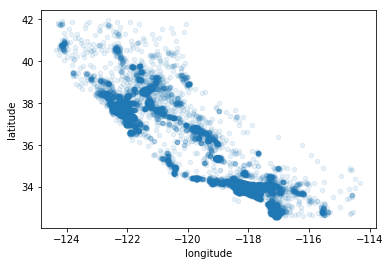

In [30]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

We can see concentration on the coast area and and some areas in the inland. But as I don't know much California, Let's use another tool

In [31]:
import plotly.express as px
fig = px.scatter_mapbox(housing, lat="latitude", lon="longitude",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                        mapbox_style="carto-positron",opacity=0.1)
fig.show()

That's alot better. We can clearly see that there's high density areas at the big cities, the downtowns and famous areas, namely San Fransico, San Jose, Long Beach, San Diego, Fresno, Sacramento, etc. 

Now let's see add the price of the houses to the visualisation and the population size to stand out more patterns 

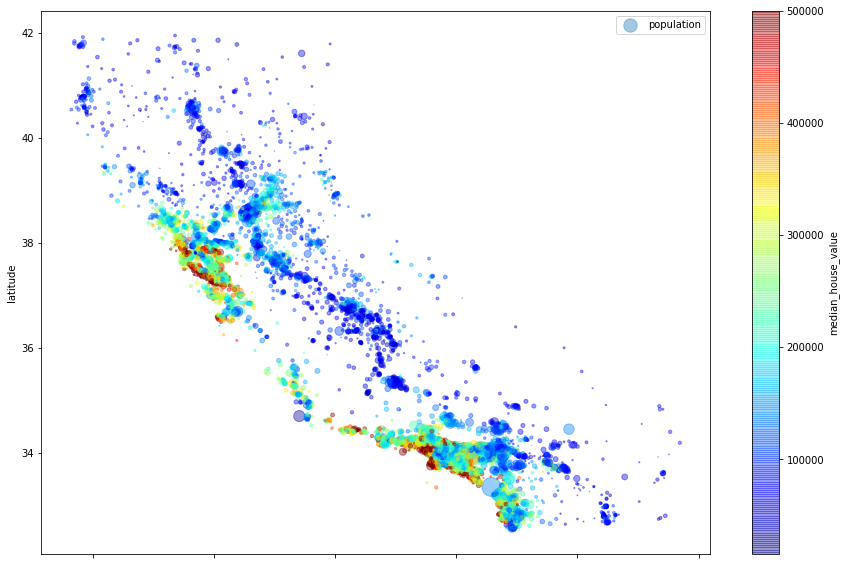

In [32]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/100, label='population',
            c="median_house_value",cmap=plt.get_cmap("jet"),
            colorbar=True,figsize=(15,10))


In [33]:
import plotly.express as px
fig = px.scatter_mapbox(housing, lat="latitude", lon="longitude",
                        color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                        mapbox_style="carto-positron",opacity=0.4,
                       size='population',size_max=15, color='median_house_value')
fig.show()

This image tells that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as we probably know already.

It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

## Looking for Correlations

Since the dataset is not too large we can compute the standard correlation coefficient (Pearson's r) between every pair of attributes  

In [34]:
corr_matrix = housing.corr()

In [35]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

_The correlation coefficient only measures linear correlations (“if x
goes up, then y generally goes up/down”). It may completely miss
out on nonlinear relationships (e.g., “if x is close to zero then y generally goes up”). Note how all the plots of the bottom row have a
correlation coefficient equal to zero despite the fact that their axes
are clearly not independent: these are examples of nonlinear relationships._

Another way to check the correlation between attributes is to plot every numerical attribute against every other numerical attribute.

As there's 11 numerical attributes, plotting each relation reuslts in having 11² = 121 plots, which is too much. We will focus on the promising ones

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028749933B00>,
      dtype=object)

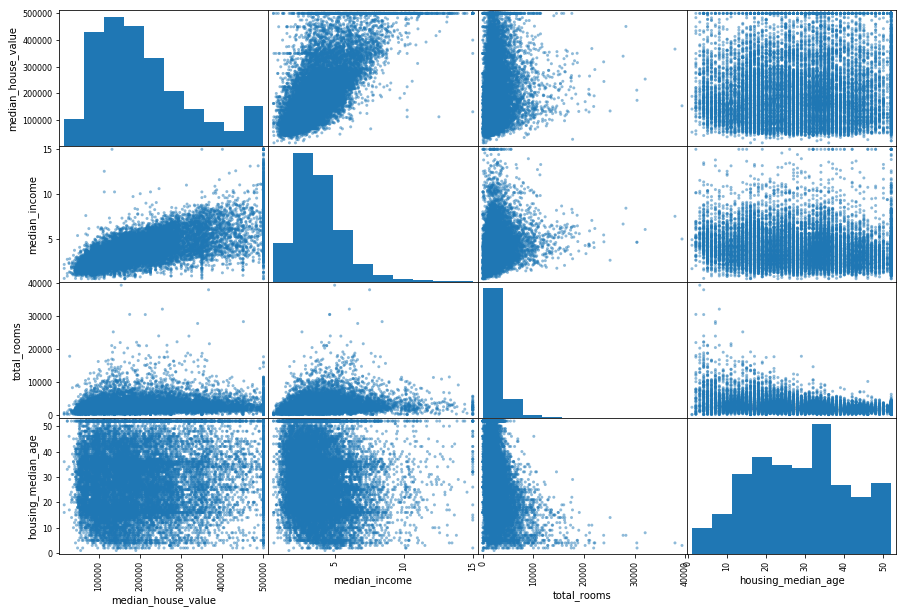

In [36]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15, 10))

The most promising attribute to predict the median house vale is the median income

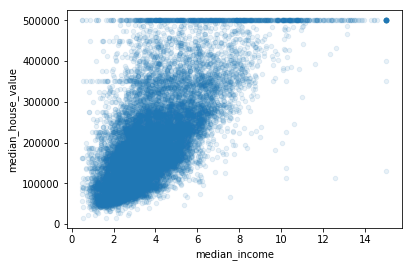

In [37]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

This plot reveals indeed the strong correlation between median income and median house value. But it shows few more things too. We can see the price cap at 500K$, but the plot reveals other straight lines : 
* at 450K 
* at 350K 
* at 280K (maybe)
* and a few more below 280K

We may want to try removing the corresponding districts to prevent the algorithms from learning to reproduce these data quirks.

## Experimenting with Attribute Combinations

In [38]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

There's some attributes here that, we've seen don't seem to have much correlation with the housing median value and particular meaning, these attributes are for exemple total_rooms,total_bedrooms,population,households.

With these attributes we can create new datas that can have strongest meanings 

In [39]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [40]:
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

# Prepare the Data for Machine Learning Algorithms

* ### Separate predictors and the labels

In [41]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

* ### Data Cleaning

* * #### Handling missing values

Most of ML algorithmes can't work with missing values. So we have to create new functions to handle them. We have three options : 
* Get rid of the missing values
* Get rid of the attributes with missing values
* Set the missing values to some value (zero, mean, median, etc.) 

In our Dataset, this is only one attribute with missing values : __total_bedrooms__. we hve to fill this values with a value : We'll take the median.

To do so we'll use a handy class provided by sklearn which computes the medians of all the numerical attributes, it's usefull because we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes

In [42]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")
#The median can be computed only on numerical attributes, so we drop the only categorical attribute
housing_num = housing.drop("ocean_proximity", axis=1)
# fit the imputer instance on the training data
imputer.fit(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


C:\Users\Stone\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [43]:
# Now we can use the trained imputer to tranform the training set
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

* * #### Handling Text and Categorical Attributes

Most ML models prefer to work with numbers, so let's convert the text labels of ocean_proximity to numbers.

Scikit-Learn provides a transformer for this task called LabelEncoder

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(housing_cat.values)
print(encoder.classes_)

[0 0 4 ... 1 0 3]
['<1H OCEAN' '<1H OCEAN' 'NEAR OCEAN' ... 'INLAND' '<1H OCEAN' 'NEAR BAY']
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


This method is not adapted for the nature of this categorical attributes. with this values, the ML algorithm will assume that two nearby values are more similar than two distant values.

We we'll use another method

In [45]:
print(housing_cat_encoded.shape)
print(housing_cat_encoded.reshape(-1,1).shape)

(16512,)
(16512, 1)


In [46]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

C:\Users\Stone\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Instead of transforming the text to integer then to one-hot vectors, we can one shot using the LabelBinarizer class

In [47]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot
# We can get a sparse matrix instead by passing sparse_output=True
# To the LabelBinarizer constructor 

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

* #### Custom Transformers

Althrough scikit-learn provides many useful tranformer, we will have to write our owns tasks. We will create classes and implement three methods : fit(), transform() and fit_transform(). We can have the last one for free by adding TransformerMixin as a base class.

Also, if we add BaseEstimator as a base class (and avoid *args and **kargs in the constructor) we will get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.

In [48]:
# we will build a class that adds the attributes that we computed earlier
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #Nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                                    bedrooms_per_room]
        else :
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

* #### Feature Scaling

Feature scaling in one if the most important transformations we need to apply. Because, with few exceptions, ML algortihms don't perform well when the attributes have very different scales 

* #### Custom Feature selection selector

In [49]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names]

### Transformation Pipelines

* #### numerial attributes 

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

num_attribs = list(housing_num)

num_pipeline = Pipeline([
    ("selector",DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

C:\Users\Stone\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



* #### categorical attributes

In [51]:
from sklearn.preprocessing import LabelBinarizer

cat_attribs = ["ocean_proximity"]

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer())
])

* #### Union of the two Pipelines

In [52]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

* #### Executing the pipeline

In [53]:
housing_prepared = full_pipeline.fit_transform(housing)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

Error from the LabelBinarizer fit_transform method because it passed form 
```python
def fit_transform(self, x, y)
    ...rest of the code

```
to
```python
def fit_transform(self, x)
    ...rest of the code

```


* #### changing the LabelBinarizer class

In [53]:
class NewLabelBinarizer(LabelBinarizer):
    def fit(self, X, y=None):
        return super(NewLabelBinarizer, self).fit(X)
    def transform(self, X, y=None):
        return super(NewLabelBinarizer, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(NewLabelBinarizer, self).fit(X).transform(X)

* #### changing the cat pipeline

In [54]:
from sklearn.preprocessing import LabelBinarizer

cat_attribs = ["ocean_proximity"]

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer', NewLabelBinarizer())
])

In [55]:
cat_pipeline.fit_transform(housing)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [56]:
# compare with the LabelBinarizer result
(housing_cat_1hot != cat_pipeline.fit_transform(housing)).sum()

0

The new class __NewLabelBinarizer__ is equivalent to __LabelBinarizer__

* #### Executing the Pipeline Again

In [57]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [58]:
# executing the whole pipeline

In [59]:
housing_prepared = full_pipeline.fit_transform(housing)

# Model Training and Selection

### Linear Regression model

* #### Training

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

* #### RMSE

In [61]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

* #### Interpretation

Knowing that the median_housing_values range between 120,000 dollars and 265,000 dollars, a RMSE of __68 628 $__ is absolutely a terrible result.

The model underfitted the results. It's means that that possibly the features do not providee nough information to make good predictions, or that the model is not powerful enough.

To fix this problem there's three main ways :
* selecting a more powerful model
* feeding the training algorithm with better features
* reducing the constraints on the model

This model is not regularized, so this rules out the last option. We can try to add more features (e.g., the log of the population), but first let’s try a more complex model to see how it does.

### Decision Tree model

* #### Training

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

* #### RMSE

In [63]:
from sklearn.metrics import mean_squared_error

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The model clearly overfitted the data. To be sure, we will use a validation method

* #### Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [65]:
def display_scores(scores):
    print("Scores :", scores)
    print("Mean :", scores.mean())
    print("Standard deviation:", scores.std())

In [66]:
display_scores(rmse_scores)

Scores : [68187.35160163 64798.68602132 70984.73658999 69374.65719359
 70917.45244964 76008.24284922 70320.36971696 71513.83389559
 77487.03963953 70433.11446591]
Mean : 71002.54844233727
Standard deviation: 3423.8497186913796


* #### Interpretation

Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model! 

The Decision Tree has a score of approximately 71,200, generally ±3,200.

* #### Comparing with the lineaer regression

In [67]:
lin_scores = cross_val_score(lin_reg,housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores : [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean : 69052.46136345083
Standard deviation: 2731.674001798349


That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

### Random Forest

* #### Training

In [68]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

C:\Users\Stone\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

* #### RMSE

In [69]:
from sklearn.metrics import mean_squared_error

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21994.343212092324

* #### Cross Validation 

In [70]:
forest_scores = cross_val_score(forest_reg,housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores : [53143.55216391 49982.94894812 53338.20510617 55449.01911965
 51078.70093735 55979.55976824 52168.7878393  50626.38249481
 54514.62498073 52539.50883563]
Mean : 52882.1290193895
Standard deviation: 1910.4090425192612


* #### Interpretation

The results are far better than the two previous models. However, the score on the training set is way higher than the results of the testing test, it means the the model stills overfitting

### SVM

* #### Training

In [71]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

svr_rbf.fit(housing_prepared, housing_labels)
svr_lin.fit(housing_prepared, housing_labels)
svr_poly.fit(housing_prepared, housing_labels)

SVR(C=100, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

* #### RMSE

In [72]:
housing_predictions = svr_rbf.predict(housing_prepared)
svr_rbf_mse = mean_squared_error(housing_labels, housing_predictions)
svr_rbf_rmse = np.sqrt(svr_rbf_mse)
print(svr_rbf_rmse)

housing_predictions = svr_lin.predict(housing_prepared)
svr_lin_mse = mean_squared_error(housing_labels, housing_predictions)
svr_lin_rmse = np.sqrt(svr_lin_mse)
print(svr_lin_rmse)

housing_predictions = svr_poly.predict(housing_prepared)
svr_poly_mse = mean_squared_error(housing_labels, housing_predictions)
svr_poly_rmse = np.sqrt(svr_poly_mse)
print(svr_poly_rmse)

95556.28260419655
71261.20809409635
74986.69642234319


* #### Cross Validation 

In [73]:
svr_rbf_scores = cross_val_score(svr_rbf,housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
svr_rbf_rmse_scores = np.sqrt(-svr_rbf_scores)
display_scores(svr_rbf_rmse_scores)

svr_lin_scores = cross_val_score(svr_lin,housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
svr_lin_rmse_scores = np.sqrt(-svr_lin_scores)
display_scores(svr_lin_rmse_scores)

svr_poly_scores = cross_val_score(svr_poly,housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
svr_poly_rmse_scores = np.sqrt(-svr_poly_scores)
display_scores(svr_poly_rmse_scores)

Scores : [ 91050.58364139  97050.28299628  96047.70402894  98586.43734731
  95816.42359514 101338.94002078  94993.2395987   99586.38743045
  98707.24384488  96531.60160879]
Mean : 96970.88441126482
Standard deviation: 2699.834749455976
Scores : [68642.41393844 69430.54481165 72031.87174908 74038.38374817
 70448.20005159 74838.91813041 67679.40029549 71188.39613988
 74437.05064953 71434.2802488 ]
Mean : 71416.94597630421
Standard deviation: 2338.483800715027
Scores : [72329.6476733  74585.34976598 87994.21592801 77416.10937663
 75127.49412593 79810.07463676 72459.34440367 76930.71996001
 81044.43660676 76291.99806881]
Mean : 77398.93905458649
Standard deviation: 4426.974346912394


* #### Interpretation

The results for the svm are even worst than the first model

## Model Fine-tuning

The Random Forest gave for us the best result, so we will focus on this one

* #### GridSearchCV

```HTML
The most important parameter is the number of random features to sample at each split point (max_features).

You could try a range of integer values, such as 1 to 20, or 1 to half the number of input features.

    max_features [1 to 20]

Alternately, you could try a suite of different default value calculators.

    max_features in [‘sqrt’, ‘log2’]

Another important parameter for random forest is the number of trees (n_estimators).

Ideally, this should be increased until no further improvement is seen in the model.

Good values might be a log scale from 10 to 1,000.

    n_estimators in [10, 100, 1000]

For the full list of hyperparameters, see:

    sklearn.ensemble.RandomForestClassifier API.
``` 
- FROM https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [75]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

Since 8 is the max value of max_features and 30 the maximum value of n_estimators that was evaluated, we should evaluate higher values

In [76]:
param_grid = [
    {'n_estimators': [30, 40, 50], 'max_features': [6, 8, 10, 12]},
    {'bootstrap': [False], 'n_estimators': [10, 12], 'max_features': [6, 8, 10]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [30, 40, 50], 'max_features': [6, 8, 10, 12]}, {'bootstrap': [False], 'n_estimators': [10, 12], 'max_features': [6, 8, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [77]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 40}

In [78]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [79]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49994.828175543604 {'max_features': 6, 'n_estimators': 30}
49786.735439142976 {'max_features': 6, 'n_estimators': 40}
49555.90982209608 {'max_features': 6, 'n_estimators': 50}
50108.85958532364 {'max_features': 8, 'n_estimators': 30}
49503.44344786665 {'max_features': 8, 'n_estimators': 40}
49551.83292809389 {'max_features': 8, 'n_estimators': 50}
50153.83931355508 {'max_features': 10, 'n_estimators': 30}
50114.18001436298 {'max_features': 10, 'n_estimators': 40}
49921.994124672005 {'max_features': 10, 'n_estimators': 50}
50539.1796432734 {'max_features': 12, 'n_estimators': 30}
50293.22447330181 {'max_features': 12, 'n_estimators': 40}
50063.25713122351 {'max_features': 12, 'n_estimators': 50}
50741.47359140143 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}
50868.774455445346 {'bootstrap': False, 'max_features': 6, 'n_estimators': 12}
51476.638411708474 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
50673.88747000763 {'bootstrap': False, 'max_features': 8, 'n

Max feature converge entre 6 et 8.

n_estimators semble croitrre.
En améliorant les parametres le modèle passe d'un RMSE de 52456 à un RMSE de 49431.


* #### RandomizedSearchCV

To get the best hyperparameters, we will use a RandomizedSearchCV which can test a larger distrib

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


param_distrib = {'n_estimators': np.logspace(2, 3, 15, endpoint=True).astype(int).tolist(),
                 'max_features': [6, 7, 8]}

forest_reg = RandomForestRegressor()

rnd_search  = RandomizedSearchCV(forest_reg, param_distrib, n_iter=21, cv=5,
                            scoring='neg_mean_squared_error',verbose=2,
                                 n_jobs=-1, random_state=42)



In [81]:
rnd_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 12.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=21, n_jobs=-1,
          param_distributions={'n_estimators': [100, 117, 138, 163, 193, 227, 268, 316, 372, 439, 517, 610, 719, 848, 1000], 'max_features': [6, 7, 8]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [82]:
rnd_search.best_params_

{'n_estimators': 439, 'max_features': 7}

In [83]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

48956.00249241335

The RMSE nicer than the one find with the GridSearch

## Best parameters

In [84]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([7.22186547e-02, 6.67951701e-02, 4.25347740e-02, 1.63302635e-02,
       1.57274105e-02, 1.62746175e-02, 1.52748959e-02, 3.49634557e-01,
       5.35256391e-02, 1.10902058e-01, 7.46287924e-02, 9.45175041e-03,
       1.49380480e-01, 8.65639832e-05, 3.10032484e-03, 4.13404792e-03])

In [85]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
f_impr = sorted(zip(feature_importances, attributes), reverse=True)

## Evaluating the System on the Test Set

In [86]:
final_model = rnd_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

In [87]:
from sklearn.metrics import mean_squared_error

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [88]:
final_rmse

46773.67246555473

* #### confidence interval for the test RMSE

In [89]:
from scipy import stats

In [90]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([44807.51629653, 48660.44959889])

# adding a transformer in the preparation pipeline to select only the most important attributes

In [91]:
# the best features

feature_importance = rnd_search.best_estimator_.feature_importances_

In [92]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [94]:
class feature_importance_selection(BaseEstimator, TransformerMixin):
    def __init__(feature_importances):
        f_impr = sorted(zip(feature_importances, attributes), reverse=True)

In [138]:
from sklearn.externals import joblib
joblib.dump(final_model, "datasets/housing/final_model.pkl") # DIFF
#my_model_loaded = joblib.load("my_model.pkl") # DIFF

['datasets/housing/final_model.pkl']